# The theory of the Atlantic Meridional Overturning Circulation (AMOC)

Deep water is formed in the Labrador and Greenland seas (in the North Atlantic), in the Ross and Weddell seas, and around Antarctica. In order to satisfy volume conservation, this water must return to the surface somewhere: the volume transported by deep-water formation must equal the volume transported by upwelling. The simplest thing to do is to assume a uniform upwelling $w$ across the whole ocean, which has area $A=4 \times 10^{13} m^2$, and

$wA=Q_S\, , $

where $Q_s=15 \times 10^6 m^3/s$ is the total rate of deep-water formation, with units of volume/time.

## Munk's Abyssal Recipes

Recall that the advection-diffusion equations for a temperature $T$ and salinity $S$ are

$$ \frac{DT}{D t} =  \nabla \cdot (\kappa_T \nabla T )  - \frac{1}{\rho_0 c_p^0}\frac{\partial Q_{rad}}{\partial z} \, , $$
$$  \rho \frac{DS}{Dt} =  \nabla \cdot ( \rho \kappa_S \nabla S ) \, .$$

In the ocean, $\kappa_T$ and $\kappa_S$ usually refer to the turbulent diffusivity, not the molecular diffusivity. The turbulent diffusivity is the effective diffusivity of the ocean: it is larger than the molecular diffusivity because it includes the effects of small-scale turbulent motions, which ove temperature and sainity faster than the molecular diffusivity. Because these small-scale turbulent motions are controlled by the ocean conditions, the turbulent diffusivity cannot be measured in the lab. 

One of the biggest questions in physical oceanography is *__What is the effective vertical diffusivity of the ocean?__*

Far from the ocean surface, $Q_{rad}=0$, so assuming steady state and the Boussinesq approximation,

$$ \left(u\frac{ \partial T}{\partial x}+v\frac{ \partial T}{\partial y}+w\frac{ \partial T}{\partial z}\right) = \nabla \cdot (\kappa_T \nabla T ) \, , $$
$$\left(u\frac{ \partial S}{\partial x}+v\frac{ \partial S}{\partial y}+w\frac{ \partial S}{\partial z}\right) =  \nabla \cdot (\kappa_S \nabla S ) \, .$$

Munk (1966) hypothesized that the below 1000m the flow obeys the vertical advection-diffusion equation, i.e. we can neglect horizontal transports of temperature and salinity. We set $\kappa_S\approx \kappa_T \approx K_v$ as the vertical diffusivity, which we will assume is uniform over the whole ocean. 

\begin{equation*}
\begin{aligned}
w\frac{\partial T}{\partial z}=K_v \frac{\partial ^2 T}{\partial z^2} \, , \\
w\frac{\partial S}{\partial z}=K_v \frac{\partial ^2 S}{\partial z^2} \, .
\end{aligned}
\end{equation*}

The solutions to the advection-diffusion equations take the form:

\begin{equation*}
\begin{aligned}
T=T_0+T_1 e^{wz/K_v} \\
S=S_0+S_1 e^{wz/K_v}
\end{aligned}
\end{equation*}

Munk fitted temperature and salinity data from the central Pacific with these functions to estimate $K_v$. The central Pacific is a good place because it has low horizontal velocities in the deep ocean. We can do the same thing here with some temperature profiles near the equator:

In [19]:
!curl -O https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/nodc.woa98/temperat/annual/otemp.raw1deg.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8357k  100 8357k    0     0  1875k      0  0:00:04  0:00:04 --:--:-- 1875k


In [20]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import netCDF4
%matplotlib inline
ds = xr.open_dataset('otemp.raw1deg.nc')

In [21]:
# Fit a function to the data
from scipy import optimize

def test_func(x, a, b, c):
    return a+b*np.exp(-x/c)

params, params_covariance = optimize.curve_fit(test_func, ds.level, ds.otemp[0,:,:,:].where((ds.lon>160) & (ds.lon<170)).isel(lat=70).mean(dim='lon'),
                                               p0=[2, 2, 2])

print(params)

[   1.52028625   27.81975956  413.91084354]


Text(0.5,0,'Temperature ($^{\\circ}C$)')

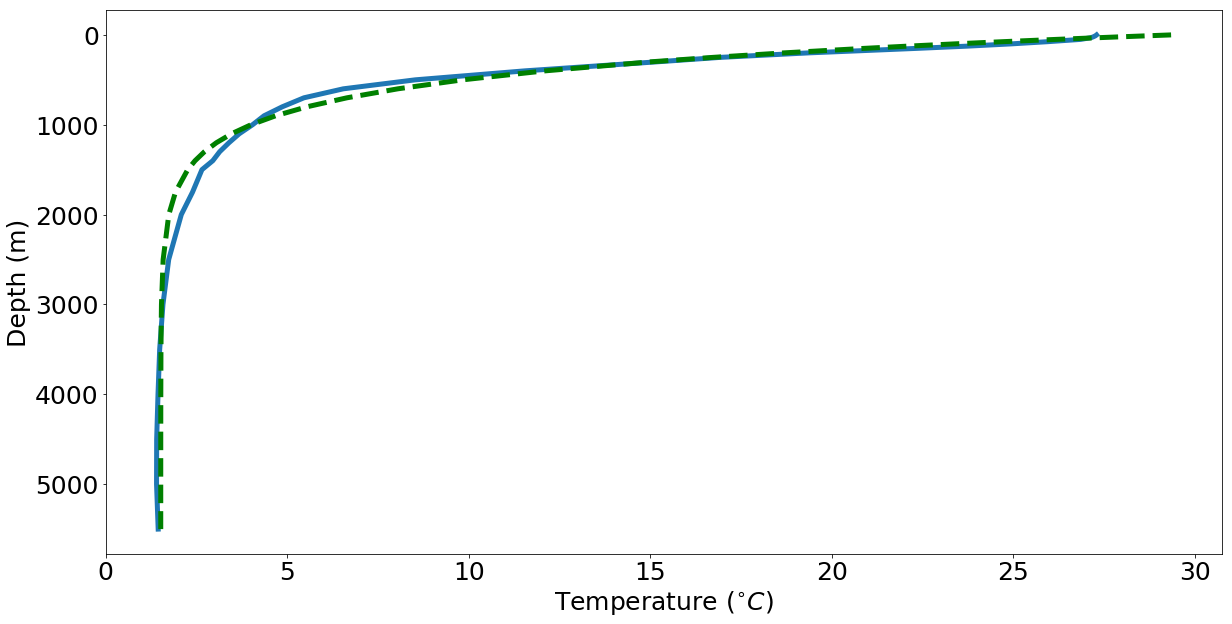

In [24]:
plt.figure(figsize=(20,10))
plt.plot(ds.otemp[0,:,:,:].where((ds.lon>160) & (ds.lon<170)).isel(lat=70).mean(dim='lon'),ds.level, linewidth=5.0)
plt.plot(test_func(ds.level, *params),ds.level, 'g--', linewidth=5.0)
plt.gca().invert_yaxis()
plt.gca().tick_params('both',labelsize=25)
plt.ylabel('Depth (m)',fontsize=25)
plt.xlabel('Temperature ($^{\circ}C$)',fontsize=25)

Based on this temperature profile, 

\begin{equation*}
\frac{K_v}{w}=414m \, .
\end{equation*}

The rate of deep water formation is about $Q_s=15Sv=15 \times 10^6 m^3/s$ and the area of the oceans is about $A=4 \times 10^{13} m^2$, so $K_v \approx 1.5 \times 10^{-4}m^2/s$. This is close to Munk's answer of $K_v \approx 1.3 \times 10^{-4}m^2/s$.

According to Munk's recipe, the upwelling of deep waters is drive by downward diffusion of heat from the surface. 

## Stommel-Arons abyssal flows

Remember the planetary vorticity equation:

$$\frac{\partial \omega}{\partial t}-f \frac{\partial w}{\partial z}+ \beta v=\frac{1}{\rho_0}\frac{\partial}{\partial z}\left(\frac{-\partial \tau_x}{\partial y}+\frac{\partial \tau_y}{\partial x}\right)$$

In the interior of the deep ocean, we are away from boundaries so $\tau_x=\tau_y=0$. We assume that the flow is in steady state, so

\begin{equation*}
f\frac{\partial w}{\partial z} = \beta v \, .
\end{equation*}

This is a form of Sverdrup balance: the left side represents vortex stretching and $\beta v$ represents the production of vorticity due to advection across the planetary vorticity gradient. The upwelling stretches the bottom part of the water column, which must move poleward in order to conserve potential vorticity.  

Now we can solve for the meridional flow by dividing by $\beta$ and integrating between the bottom, $z=-H$, and a point in the interior below the wind-driven flow, $z=z_I$:

\begin{equation*}
\int_{z=-H}^{z=z_I} v dz=\frac{f}{\beta} \left(w|_{z=z_I} -w|_{z=-H}\right)
\end{equation*}

$w|_{z=z_I}$ is the vertical velocity in the interior, which is $Q_s/A$. $w|_{z=-H}$ is the vertical velocity at the bottom of the ocean, which is zero. So,

\begin{equation*}
V=\frac{f Q_s}{\beta A} \, .
\end{equation*}

Here, $V$ is the depth integrated meridional velocity in the deep ocean, which I've plotted below.

In [1]:
!curl -O http://research.jisao.washington.edu/datasets/elevation/fractional_land.1-deg.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   290k      0 --:--:-- --:--:-- --:--:--  290k


In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import netCDF4
%matplotlib inline
ds = xr.open_dataset('fractional_land.1-deg.nc',decode_times=False)
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 ...
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * time     (time) float64 0.0
Data variables:
    data     (time, lat, lon) float32 ...

Text(0.5,1,'Predicted meridional velocity in the deep ocean, integrated vertically (units are $m^2/s$)')

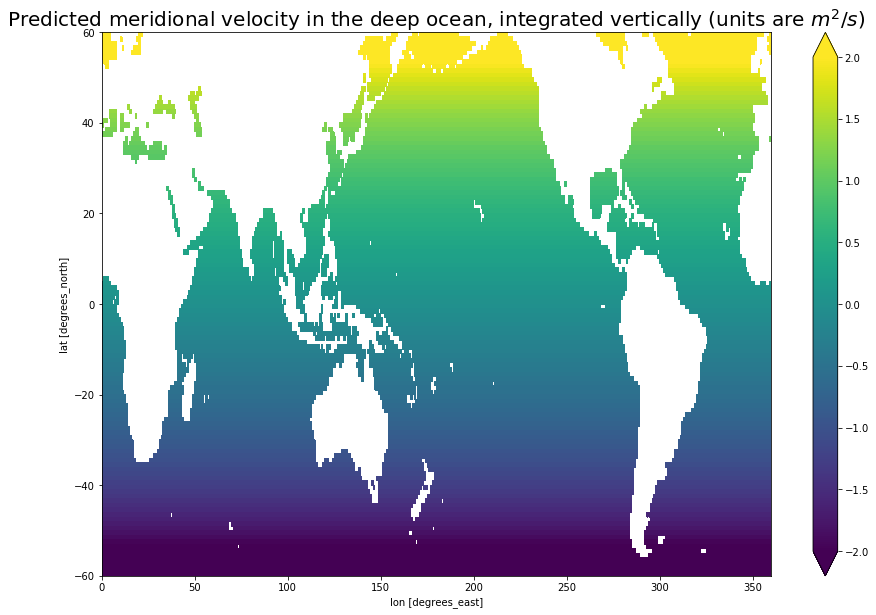

In [17]:
import copy
ds2=copy.deepcopy(ds)
ds2['data']=ds['data']+4*10**6*np.tan(np.deg2rad(ds['lat']))*15*10**6/4/10**13
#ds2=ds2.where(ds.data==0)
ds2.where(ds.data==0).where((ds.lat<60) & (ds.lat>-60)).to_array().plot(vmin=-2,vmax=2, aspect=1.5,size=10)
plt.ylim(-60,60) 
plt.title('Predicted meridional velocity in the deep ocean, integrated vertically (units are $m^2/s$)',fontsize=20)

$f$ is positive in the northern hemisphere and negative in the southern hemisphere, so $V$ is northward in the northern hemisphere and southward in the southern hemisphere. Sometimes $V$ is towards a source of deep water: sources of deep water are marked $S_1$ and $S_2$ in the figure below (from Stommel and Arons' 1959 paper). As in the upper ocean, volume must be conserved, which is enabled by **western boundary currents**. Remember that this figure assumes uniform upwelling of deep waters. 

So for example, upwelling in the Northern Hemisphere of the Atlantic Ocean is associated with northward flow in the interior of the deep ocean. But there is a source of deep water in the far north of the Atlantic, so the net transport at depth must be southward. Therefore a southward western boundary current transports the water from $S_1$ *and* the water that flowed north in the interior southward towards the equator. 

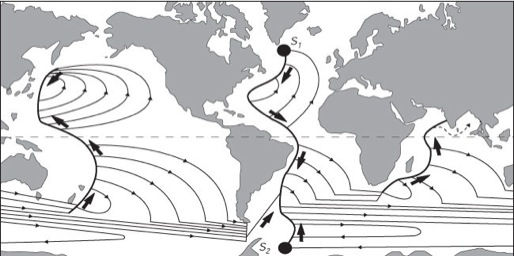